Utilizar los datos de Titanic para predecir la variable respuesta Survived a partir de

a) un arbol de decision.

b) un arbol de decision podado, eligiendo el parametro α mediante validacion cruzada.

c) bagging.

d) un bosque aleatorio.

e) boosting.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree


In [33]:
df = pd.read_csv("C:\\Users\\dario\\OneDrive\\Escritorio\\Unab\\Inferencia y Patrones\\Comisión 2 Florencia Statti\\Datos para Ejercicios\\datos_titanic.csv")

In [34]:
#Eliminamos las columnas a no utilizar
X = df.drop(["Survived", "Name", "Ticket", "Cabin"], axis = 1)

#Transformamos las variables tipo str a int
le = LabelEncoder()
X["Embarked"] = le.fit_transform(X["Embarked"])
X["Sex"] = le.fit_transform(X["Sex"])

#Reemplazamos datos faltantes

promedio = np.nanmean(X["Age"])


X["Age"] = np.where(np.isnan(X["Age"]), promedio, X["Age"])


In [ ]:
y = df["Survived"]
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 0.80)

In [ ]:
#B Árbol podado con Alpha seleccionado por cross-validation
arbol_base = DecisionTreeClassifier(random_state= 42)
arbol_base.fit(X_train,y_train)

In [65]:
#Obtener árboles podados con distintos Alpha
podas = arbol_base.cost_complexity_pruning_path(X_train,y_train)
alphas = podas.ccp_alphas[:-1] #Saca el último arbol que esta vacio

In [66]:
#Entrenamos un árbol para cada alpha hallado

modelos = []

for i in alphas:
    podados = DecisionTreeClassifier(random_state= 42, ccp_alpha = i)
    podados.fit(X_train,y_train)
    modelos.append(podados)

In [67]:
#Evaluar a los modelos con validacion cruzada
scores = [np.mean(cross_val_score(modelo, X_train, y_train, cv = 5)) for modelo in modelos]

In [68]:
#Buscamos al mejor Alpha

mejor_indice = np.argmax(scores)
mejor_alpha = alphas[mejor_indice]

In [69]:
modelo_final = DecisionTreeClassifier(random_state=42, ccp_alpha= mejor_alpha)
modelo_final.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [70]:
prediccion_final = modelo_final.predict(X_test)

print("Punto A realizado con Árbol de Decisión Podado, obtuvo")
print(f"Precision: {accuracy_score(prediccion_final, y_test)}")

Punto A realizado con Árbol de Decisión Podado, obtuvo
Precision: 0.8050490883590463


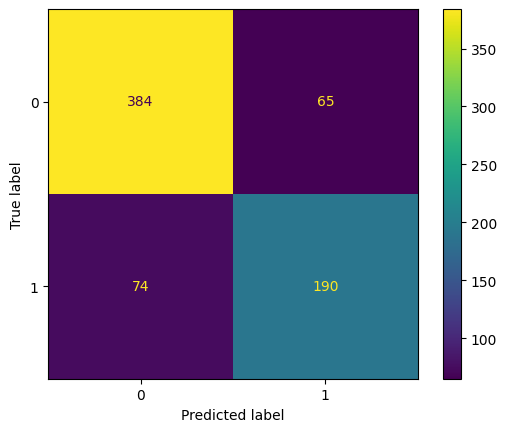

In [71]:
cm = confusion_matrix(y_test, prediccion_final)
ConfusionMatrixDisplay(cm).plot()

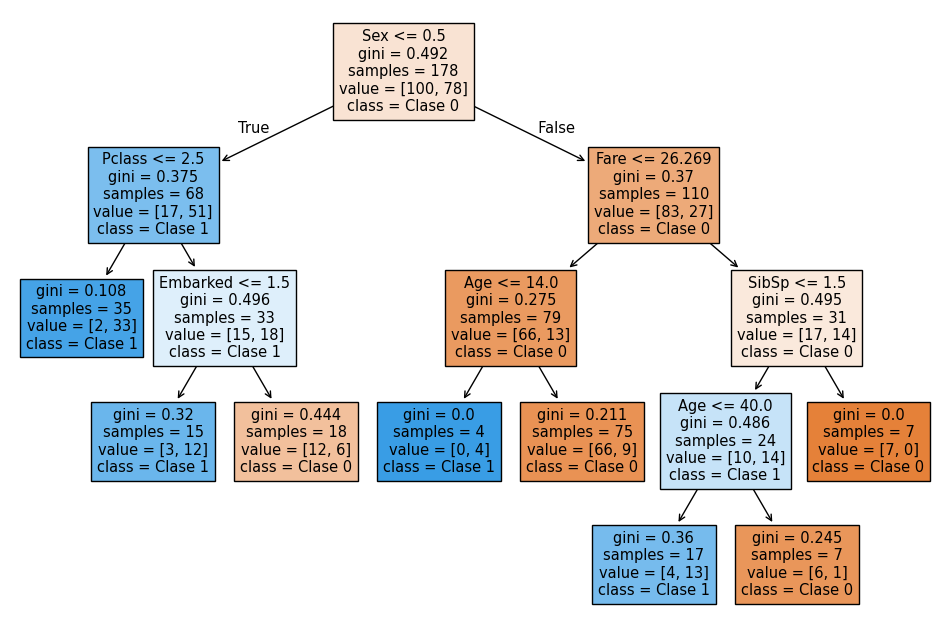

In [72]:
plt.figure(figsize=(12,8))
plot_tree(modelo_final, filled= True, feature_names= X.columns, class_names=["Clase 0", "Clase 1"])
plt.show()